# Analyse de sentiment

# TP 01-01

Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Chargement et affichage de notre ensemble de données

In [2]:
df=pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### 1-) Trouvons le nombre d’avis positifs et négatifs dans le jet de données

Définissons une fonction "nombres_avis" qui prenda en entrée notre jet de données et retournera le nombre d'avis positifs et négatifs dans la colonne "sentiment"

In [5]:
def nombres_avis(df):
    return df['sentiment'].value_counts()

Application de la fonction sur notre jet de données

In [6]:
nombres_avis(df)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

#### Conclusion: Nous avons 25000 avis positifs et 25000 avis négatifs dans notre jet de données

### 2-) Trouvons la proportion (pourcentage) d’avis positifs et négatifs dans l’ensemble de données

A l'aide d'un diagramme circulaire nous allons visualiser la proportion d'avis positifs et négatifs dans notre jet données

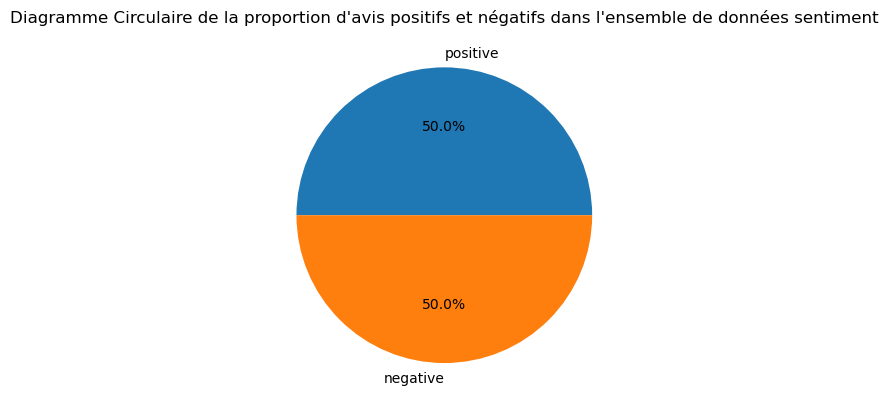

In [7]:
sentiment1 = ['sentiment']
for i in sentiment1:
    df[i].value_counts().plot.pie(autopct = '%1.1f%%')
    plt.title(f"Diagramme Circulaire de la proportion d'avis positifs et négatifs dans l'ensemble de données {i}")
    plt.ylabel('')
    plt.show()

#### Interprétation:On peut observer que notre jet de données contient 50% d'avis positifs et 50% d'avis négatifs.Ce qui confirme le nombres d'avis positifs et négatifs trouver précedemment

### 3-)Trouvons la longueur de l’avis le plus long

 Définissons une fonction "avis_long" qui prenda en entrée notre jet de données et retournera la valeur maximale  parmis les les longueurs de chaque chaîne de caractères dans la colonne "review" sans les différentes ponctuations

In [8]:
def avis_long(df):
    return df['review'].str.len().max()

Affichage de la longueur de l'avis le plus long

In [9]:
print("La longueur de l'avis le plus long est :",avis_long (df))

La longueur de l'avis le plus long est : 13704


### 4-) Trouvons la critique la plus courte


Définissons une fonction "critique_courte" qui prenda en entrée notre jet de données et retournera la critique  la plus courte 

In [10]:
def critique_courte(df):
    return df.loc[df['review'].str.len().idxmin(), 'review']

Affichage de la critique la plus courte

In [11]:
print("La critique la plus courte est:", critique_courte(df))

La critique la plus courte est: Read the book, forget the movie!


# TP 01-02

### 1-) Choix d'une phrase dans le jet de données

Définissons une fonction "phrase_hasard" qui prenda en entrée notre jet de données et retournera un avis choisi au hasard dans la colonne "review"

In [12]:
def phrase_hasard(df):
    random_review = df.sample(1)["review"].values[0]
    return random_review

Affichage de la phrase choisi par l'algo

In [59]:
avis1=phrase_hasard(df)
avis1

"Talk about over acting...!!!! not just by Govinda, but also by Salman and Lara....The direction was awful. The first half hour you would pretty much want to switch the movie off..because this movie is a real stinker (mark my words. <br /><br />I liked Govinda in some o his comedy roles like Haseena Maan Jaayegi, Jodi No. 1, Akhiyon se Goli Maare and Jis Desh Mein Ganga Rehta Hai and this does not compare to any of them. And Salman Khan should not do comedy roles at all!! He sucks. He does not know how to do comedy. The only good comedy role he did was in Andaz Apna Apna, which was brilliant next to Amir Khan. <br /><br />There were so many 'overly done stupidly unfunny' scenes in this movie that make you want to take out the DVD and burn it so no one else in your house watches it ever again."

### 2-) Calcul de la polarité et la subjectivité de cette phase

In [14]:
#Importation de la bibliothèque texblob pour les traitement sur notre phrase
!pip install textblob

In [15]:
from textblob import TextBlob

Calcul et affichage de la subjectivité de notre phrase

In [60]:
blob= TextBlob(avis1)
# Obtenir la subjectivité
subjectivité = blob.sentiment.subjectivity
print(f"La Subjectivité de la phrase est: {subjectivité}")

La Subjectivité de la phrase est: 0.5866666666666667


#### Interprétation: Plus la valeur se rapproche de 0 plus notre phrase est objectif et plus elle se rapproche de 1 plus elle est subjectif. Dans le cas de notre phrase on peut dire que notre phrase est légèrement subjective car la valeur trouvé est plus proche de 1 que de 0 (0.586). Notre phrase contient donc à la fois des faits et des opinions 

Calcul et affichage de la polarité de notre phrase

In [61]:
blob2 = TextBlob(avis1)
polarité = blob.sentiment.polarity
print(f"La Polarité de la phrase est: {polarité}")

La Polarité de la phrase est: 0.04805555555555557


#### Interprétation: La valeur de la polarité de notre phrase est 0.048 qui est un score plus proche de 0(Texte neutre).Cet avis peut donc correspondre à une personne ayant un avis neutre sur le film (ni négatif, ni positif)

# TP 01-03

## 1-) Choix de 100 meilleures critiques positives

Définissons une fonction "sentiment_score" pour le calcul de la polarité de chaque critique 

In [62]:
def sentiment_score(text):
    return TextBlob(text).sentiment.polarity  

Filtrons uniquement les avis positifs

In [63]:
df_positive = df[df['sentiment'] == "positive"].copy()

Calculons la polarité et la longueur de chaque critique

In [64]:
df_positive['sentiment_score'] = df_positive['review'].apply(sentiment_score)
df_positive['length'] = df_positive['review'].str.len()

Trions les critique d'abord par la polarité, puis par longueur (si il y a égalité de polarité entre plusieurs critiques on trie par la longueur)

In [65]:
df_trie = df_positive.sort_values(by=['sentiment_score', 'length'], ascending=[False, False])

 Sélection des 100 meilleures critiques positives

In [66]:
df_top_100 = df_trie.head(100)

Affichage des 100 mailleures critiques positives choisis

In [67]:
df_top_100

,review,sentiment,sentiment_score,length
39182,Smallville episode Justice is the best episode...,positive,1.000000,662
48927,Smallville episode Justice is the best episode...,positive,1.000000,662
1440,This was one of my favorites as a child. My fa...,positive,1.000000,344
36227,Sjöströms masterpiece and a movie that capture...,positive,1.000000,281
33502,John has made two One man shows. Spic O Rama a...,positive,1.000000,250
...,...,...,...,...
15384,Bette Midler showcases her talents and beauty ...,positive,0.637500,585
36417,Bette Midler showcases her talents and beauty ...,positive,0.637500,585
42311,Thsi is one great movie. probably the best mov...,positive,0.636667,734
21891,"A very engaging, intelligent, and well-made fi...",positive,0.636667,241


## 2-)Création du nuage de mots

Installation de la bibliothèque "wordcloud" pour la création du nuage de mots

In [88]:
!pip install wordcloud 


Transformation des avis positives en un paragraphe

In [89]:
paragraph = ' '.join(df_top_100['review'].tolist())
paragraph

'Smallville episode Justice is the best episode of Smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! It\'s my favorite episode of Smallville! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! Smallville episode Justice is the best episode of Smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! 

Installation du package nltk

In [90]:
!pip install nltk

Définissons une fonction "clean_text" pour le néttoyage de notre paragraphe

In [92]:
import string
stop_words= set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()  # Convertion en minuscule
    text = ''.join(char for char in text if char not in string.punctuation)  # Suppression des ponctuations
    words = text.split()  # Séparer les mots
    words = [word for word in words if word not in stop_words]  # Suppression des stopwords
    return ' '.join(words)

Néttoyage de notre paragraphe

In [93]:
paragraph2 =clean_text(paragraph)
paragraph2

'smallville episode justice best episode smallville favorite episode smallville smallville episode justice best episode smallville favorite episode smallville one favorites child family 8track tape soundtrack took us years 20s us get video movie dad taped hbo something every summer go beach mom brother sister lay beach sing songs movie loved sjöströms masterpiece movie captures swedish soul also served great inspiration bergman similarites körkarlen smultronstället sjöström leading role isak borg 1957 coincidence dont miss world john made two one man shows spic rama freaks neither one shown dvd john john put dvd john people seethey need see john case anyones keeping watchful aye movie smiling beginning end partly humor partly meg ryan perfect character always one best feelgood movies ive seen hopefully dvd soon watched film hundred times really best serbian movie made everi wood like recommend movie everyone good comedy surely like brilliant moving performances tom courtenay peter finc

Création du nuage de mots et visualisation avec la bibliothèque matplotlib

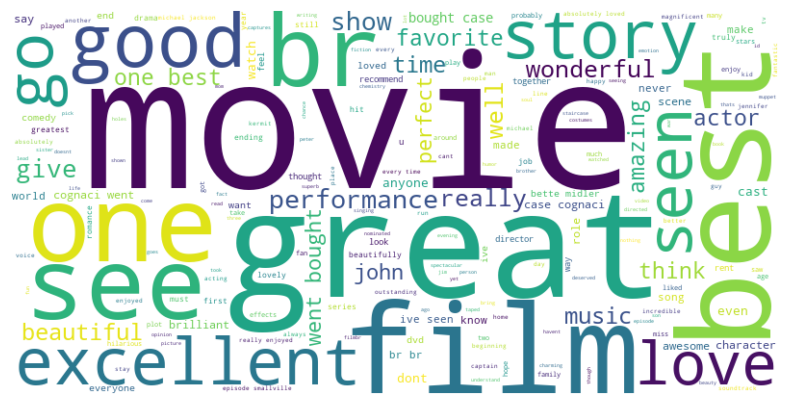

In [96]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(paragraph2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Conclusion : Aprés analyse de ce nuage de mots, les mots qui me viennent à l'esprit sont: meilleur, film, super, excellent, brillant. Oui ces mots ont un sens pour moi car ils me transmettent un sentiment positif sur le film


# TP 01-04

##  1-)Importons le vectoriseur depuis sklearn.

Installation de la bibliothèque sklearn

In [97]:
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn


In [98]:
from sklearn.feature_extraction.text import CountVectorizer

## 2-) Construisons le vectoriseur et spécifions les paramètres suivants : la taille du vocabulaire doit être limitée à 1000, inclure uniquement les bigrammes et ignorer les termes qui apparaissent dans plus de 500 documents.

In [99]:
vectoriseur = CountVectorizer(max_features=1000,  ngram_range=(2,2),   max_df=500) 

## 3-) Ajustons le vectoriseur à la colonne des avis

In [100]:
X = vectoriseur.fit_transform(df['review'])

## 4-) Création d'un DataFrame à partir de la représentation BOW

In [101]:
bow_df = pd.DataFrame(X.toarray(), columns=vectoriseur.get_feature_names_out())
bow_df

,10 br,10 minutes,20 minutes,90 minutes,about an,about as,about her,absolutely no,across as,acting in,...,you in,you must,you need,you that,you the,you were,young man,young woman,your life,your own
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TP 01-06

# Application à notre jet de données


## Détection de la langue

Installation de la bibliothèque "langdetect" pour la détection de la langue utilisé dans une phrase

In [102]:
!pip install langdetect

Exemple d'application avec une fonction "langue_utilisé_pourcentage" pour connaître la langue utilisé dans une phrase et la probabilité

In [103]:
from langdetect import detect_langs

def langue_utilisé_pourcentage(text):
    try:
        # Détecter les langues et leurs probabilités
        langs = detect_langs(text)
        return {str(lang.lang): round(lang.prob * 100, 2) for lang in langs}
    except:
        return {"unknown": 100.0} 

Exemple d'utilisation sur une phrase

In [104]:
print(langue_utilisé_pourcentage("Ce film est génial et passionnant !")) 

{'fr': 100.0}


Application de la détection sur les 30 premières lignes de notre jet de données

In [105]:
df2 = df.head(30)  
df2['langue_utilsé_pourcentage'] = df2['review'].apply(langue_utilisé_pourcentage)
df2

C:\Users\hp\AppData\Local\Temp\ipykernel_4088\1016905186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['langue_utilsé_pourcentage'] = df2['review'].apply(langue_utilisé_pourcentage)


,review,sentiment,langue_utilsé_pourcentage
0,One of the other reviewers has mentioned that ...,positive,{'en': 100.0}
1,A wonderful little production. <br /><br />The...,positive,{'en': 100.0}
2,I thought this was a wonderful way to spend ti...,positive,{'en': 100.0}
3,Basically there's a family where a little boy ...,negative,{'en': 100.0}
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,{'en': 100.0}
5,"Probably my all-time favorite movie, a story o...",positive,{'en': 100.0}
6,I sure would like to see a resurrection of a u...,positive,{'en': 100.0}
7,"This show was an amazing, fresh & innovative i...",negative,{'en': 100.0}
8,Encouraged by the positive comments about this...,negative,{'en': 100.0}
9,If you like original gut wrenching laughter yo...,positive,{'en': 100.0}


 Affichage du vocabulaire

In [106]:
print("Vocabulaire :", vectoriseur.get_feature_names_out())

Vocabulaire : ['10 br' '10 minutes' '20 minutes' '90 minutes' 'about an' 'about as'
 'about her' 'absolutely no' 'across as' 'acting in' 'action and'
 'action movie' 'action scenes' 'adaptation of' 'add to' 'admit that'
 'after that' 'after this' 'again br' 'again the' 'ago and' 'all but'
 'all his' 'all those' 'also has' 'also very' 'an action' 'an amazing'
 'an oscar' 'and acting' 'and again' 'and am' 'and bad' 'and be' 'and by'
 'and didn' 'and do' 'and does' 'and doesn' 'and enjoy' 'and finally'
 'and found' 'and funny' 'and go' 'and great' 'and made' 'and makes'
 'and many' 'and or' 'and out' 'and yes' 'any more' 'anything else'
 'anything to' 'appeal to' 'are few' 'are going' 'are good' 'are great'
 'are many' 'are more' 'are really' 'are still' 'are you' 'around in'
 'as always' 'as being' 'as is' 'as long' 'as possible' 'as some'
 'as soon' 'as though' 'as usual' 'aside from' 'aspect of' 'aspects of'
 'at her' 'at home' 'at some' 'attempt at' 'attention to' 'avoid this'
 'away 

#  Création d'un modèle de régression logistique à l'aide tweets de l'ensemble de données.

# TP 01-07

Chargement et affichage de l'ensemble de données

In [107]:
df_tweets=pd.read_csv("Tweets.csv")
df_tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


Informations sur notre ensemble de données

In [108]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Statistique descriptives des variables quantitatives

In [109]:
df_tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


Création d'un diagramme circulaire pour la visualisationde la  proportion d'avis positifs, négatifs et neutre de l'ensemble des compagnies aériennes

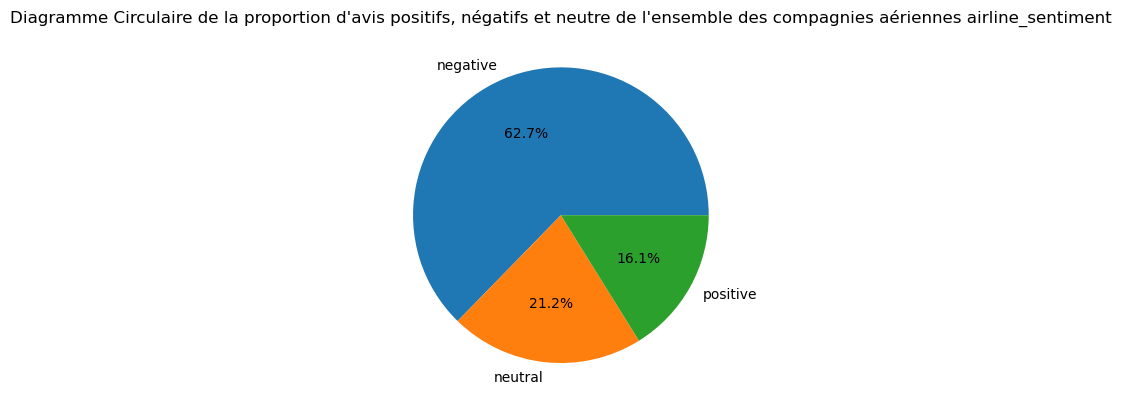

In [111]:
sentiment2 = ['airline_sentiment']
for i in sentiment2:
    df_tweets[i].value_counts().plot.pie(autopct = '%1.1f%%')
    plt.title(f"Diagramme Circulaire de la proportion d'avis positifs, négatifs et neutre de l'ensemble des compagnies aériennes {i}")
    plt.ylabel('')
    plt.show()

#### Interprétation: Globalement il y a une grande quantité d'avis négatifs (62.7%) comparé à la proportion d'avis neutre (21.2%) et d'avis positifs (16.1%). Les voyageurs ne sont donc généralement pas satisfait des services offerts par les compagnies aériennes

Pourcentage des avis par compagnies et par sentiments

In [113]:
pourcentages_compagnies = df_tweets.groupby('airline')['airline_sentiment'].value_counts(normalize=True).unstack() * 100
pourcentages_compagnies

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


Vérifions si la colonne de la variable cible "airline_sentiment" et la colonne des tweets "text" présentent des valeurs manquantes

In [114]:
print(df_tweets.isnull().sum()) 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


Etant donné que les colonnes des variables à utiliser pour la création de notre modèle ne contiennent pas de valeurs manquantes nous allons garder uniquement les colonnes à utiliser

In [115]:
df_tweets2 = df_tweets[['text', 'airline_sentiment']].dropna()
df_tweets2

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


Nous allons maintenant Convertir les avis en variables quantitatives: 0 pour les 
tweets négatifs, 1 pour les tweets neutres et 2 pour les tweets positifs

In [116]:
sentiment_remplace={"negative":0, "neutral":1, "positive":2}
df_tweets2["airline_sentiment"]=df_tweets2["airline_sentiment"].map(sentiment_remplace)
df_tweets2

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,2
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


## 1-) Construisons et ajustons un modèle de régression logistique en utilisant les arguments définis X et y

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Séparons le dataframe en données d'entraînement et de test

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df_tweets2['text'], df_tweets2['airline_sentiment'], test_size=0.2, random_state=42)

Vectorisation des tweets avec TF-IDF

In [121]:
vectoriseur2 = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectoriseur2.fit_transform(X_train)
X_test_tfidf = vectoriseur2.transform(X_test)

In [122]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

Entraînement du modèle de régression logistique

In [123]:
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

## 2-) Prédiction des étiquettes.

In [124]:
y_pred = model.predict(X_test_tfidf)

## 3-) Calcul de la précision du modèle de régression logistique

In [126]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Le score de prédiction du modèle est: {accuracy}")

Le score de prédiction du modèle est: 0.7954234972677595


## 4-) Calcul du score de précision en utilisant les étiquettes prédites et vraies.

Création d'un DataFrame avec les exemples, les vraies valeurs et les prédictions

In [127]:
resultats = pd.DataFrame({'Texte': X_test[:10], 'Vraies valeurs': y_test[:10], 'Prédictions': y_pred[:10]})
resultats

,Texte,Vraies valeurs,Prédictions
4794,@SouthwestAir you're my early frontrunner for ...,2,2
10480,@USAirways how is it that my flt to EWR was Ca...,0,0
8067,@JetBlue what is going on with your BDL to DCA...,0,0
8880,@JetBlue do they have to depart from Washingto...,1,1
8292,@JetBlue I can probably find some of them. Are...,0,1
927,@united still waiting to hear back. My wallet ...,0,0
3165,@united Yes my flight was rebooked. I'm just l...,0,0
7894,@JetBlue Thank you ! What about Paris ? Could ...,1,1
2818,"@united not 100% sure, however my ticket inclu...",0,0
9145,@usairways great crew for flight 504 PHX to YV...,2,2


Testons le modèle sur des avis

In [134]:
# Exemple de texte pour le test
test_phrase = [
    "I absolutely loved the new movie; it was amazing!",  # Phrase positive
    "I really hated the food, it was awful.",           # Phrase négative
    "The weather today is just okay, nothing special."  # Phrase neutre
]
# Affichage des résultats
for i, phrase in enumerate(test_phrase):
    sentiment10 = 'Negative' if y_pred[i] == 0 else 'Neutral' if y_pred[i] == 1 else 'Positive' 
    print(f"Phrase: '{phrase}'\nSentiment Prédit: {sentiment10}\n")

Phrase: 'I absolutely loved the new movie; it was amazing!'
Sentiment Prédit: Positive

Phrase: 'I really hated the food, it was awful.'
Sentiment Prédit: Negative

Phrase: 'The weather today is just okay, nothing special.'
Sentiment Prédit: Negative



# TP 01-08 et TP 01-09

### Matrice de confusion

Importation des fonctions de score de précision et de matrice de confusion.

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

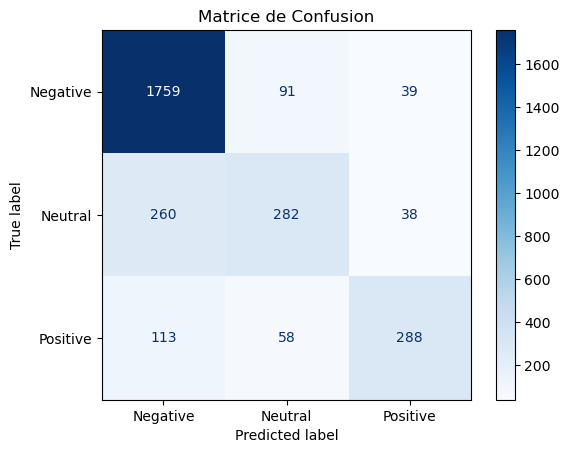

In [132]:
# Calcul de la matrice de confusion
mc= confusion_matrix(y_test, y_pred)

# Affichage avec matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap="Blues")
plt.title("Matrice de Confusion")
plt.show()


#### Interprétation: La matrice de confusion du modèle nous montre qu'il performe bien pour la prédiction de sentiment négatifs que pour la prédiction des autres sentiments(1759 comme vrais négatifs)

### Rapport de classification

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1889
           1       0.65      0.49      0.56       580
           2       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928

